# Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read In Data

In [ ]:
pos_test = pd.read_csv("drive/MyDrive/IMDb/test/positive_test_full.csv", index_col=0)
pos_test.head(1)

,ReviewID,titleid,titletype,primarytitle,originaltitle,isadult,startyear,endyear,runtimeminutes,genres,Review,Score
0,0,tt0406816,movie,The Guardian,The Guardian,False,2006,NaN,139.0,"[""'Action'"", ""'Adventure'"", ""'Drama'""]",I went and saw this movie last night after bei...,10


In [ ]:
neg_test = pd.read_csv("drive/MyDrive/IMDb/test/negative_test_full.csv", index_col=0)
pos_test.head(1)
pos_train = pd.read_csv("drive/MyDrive/IMDb/train/positive_train_full.csv", index_col=0)
neg_train = pd.read_csv("drive/MyDrive/IMDb/train/negative_train_full.csv", index_col=0)

In [ ]:
full_dataset = pos_test.append(neg_test)
full_dataset = full_dataset.append(pos_train)
full_dataset = full_dataset.append(neg_train)
full_dataset.shape

(49232, 12)

In [ ]:
full_dataset[full_dataset["Score"] == 5]

,ReviewID,titleid,titletype,primarytitle,originaltitle,isadult,startyear,endyear,runtimeminutes,genres,Review,Score


In [ ]:
full_dataset["Score"]

0        10
1        10
2         7
3         7
4        10
         ..
12495     1
12496     1
12497     4
12498     2
12499     2
Name: Score, Length: 49232, dtype: int64

In [ ]:
#tinydf2 = pd.DataFrame(tinydf2.groupby(by = "Genre").size())
df = pd.DataFrame(full_dataset.groupby(by = "Score").size(), index= None)
df["Score"] = df.index
df.columns = ["Count", "Score",]
df

,Count,Score
Score,,
1,10122,1
2,4586,2
3,4961,3
4,5331,4
7,4656,7
8,5685,8
9,4483,9
10,9408,10


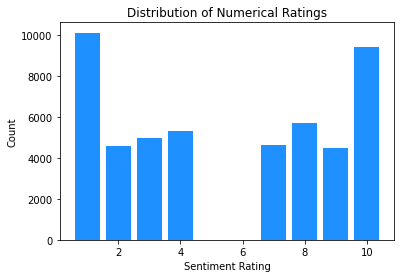

In [ ]:
plt.bar(df["Score"], df["Count"], color = "dodgerblue")
plt.ylabel("Count")
plt.xlabel("Sentiment Rating")
plt.title("Distribution of Numerical Ratings")
plt.show()

# Plots

In [ ]:
!ls

drive  sample_data


In [ ]:
pos_test = pd.read_csv("drive/MyDrive/IMDb/test/positive_test_full.csv", index_col=0)
pos_test.head(1)

,ReviewID,titleid,titletype,primarytitle,originaltitle,isadult,startyear,endyear,runtimeminutes,genres,Review,Score
0,0,tt0406816,movie,The Guardian,The Guardian,False,2006,NaN,139.0,"[""'Action'"", ""'Adventure'"", ""'Drama'""]",I went and saw this movie last night after bei...,10


In [ ]:
neg_train = pd.read_csv("drive/MyDrive/IMDb/train/negative_train_full.csv", index_col = 0)
neg_train.head(1)

,ReviewID,titleid,titletype,primarytitle,originaltitle,isadult,startyear,endyear,runtimeminutes,genres,Review,Score
0,0,tt0064354,movie,Futz,Futz,False,1969.0,NaN,92.0,"[""'Comedy'""]",Story of a man who has unnatural feelings for ...,3


In [ ]:
positive_genres = []

for row in pos_test.iterrows():
  try:
    genres = row[1]["genres"]
    genres = genres.replace("[","")
    genres = genres.replace("]","")
    genres = genres.replace('"','')
    genres = genres.replace("'","")

    gs = genres.split(",")
    for word in gs:
      word = word.replace(" ","")
      positive_genres.append(word)
  except:
    print("",end = "")
  


In [ ]:
len(positive_genres)
tinydf = pd.DataFrame(positive_genres)
tinydf.columns = ["Genre"]
tinydf = pd.DataFrame(tinydf.groupby(by = "Genre").size())
tinydf["Genre"] = tinydf.index
tinydf.columns = ["Count", "Genre"]
tinydf.head()
tinydf = tinydf.sort_values(by = "Count", ascending = False)

In [ ]:
tinydf["Sentiment"] = "positive"

In [ ]:
tinydf.head()

,Count,Genre,Sentiment
Genre,,,
Drama,6270,Drama,positive
Comedy,4020,Comedy,positive
Romance,2026,Romance,positive
Crime,1717,Crime,positive
Action,1445,Action,positive


In [ ]:
negative_genres = []

for row in neg_train.iterrows():
  try:
    genres = row[1]["genres"]
    genres = genres.replace("[","")
    genres = genres.replace("]","")
    genres = genres.replace('"','')
    genres = genres.replace("'","")

    gs = genres.split(",")
    for word in gs:
      word = word.replace(" ","")
      negative_genres.append(word)
  except:
    print("",end = "")
  

In [ ]:
len(negative_genres)
tinydf2 = pd.DataFrame(negative_genres)
tinydf2.columns = ["Genre"]
tinydf2 = pd.DataFrame(tinydf2.groupby(by = "Genre").size())
tinydf2["Genre"] = tinydf2.index
tinydf2.columns = ["Count", "Genre"]
tinydf2.head()
tinydf2 = tinydf2.sort_values(by = "Count", ascending = False)

In [ ]:
tinydf2["Sentiment"] = "negative"

In [ ]:
tinydf2.shape

(28, 3)

In [ ]:
tinydf.shape

(28, 3)

In [ ]:
frames = [tinydf2,tinydf]
df = pd.concat(frames)
df = df.sort_values(by = "Count", ascending = False)

In [ ]:
df.head()

,Count,Genre,Sentiment
Genre,,,
Drama,6270,Drama,positive
Drama,4763,Drama,negative
Comedy,4020,Comedy,positive
Comedy,3580,Comedy,negative
Horror,3110,Horror,negative


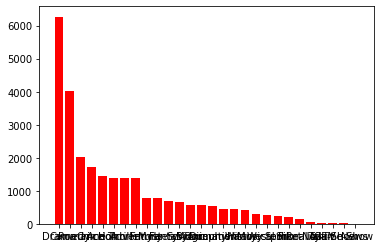

In [ ]:
plt.bar(df["Genre"], df["Count"], color = "red")
plt.show()

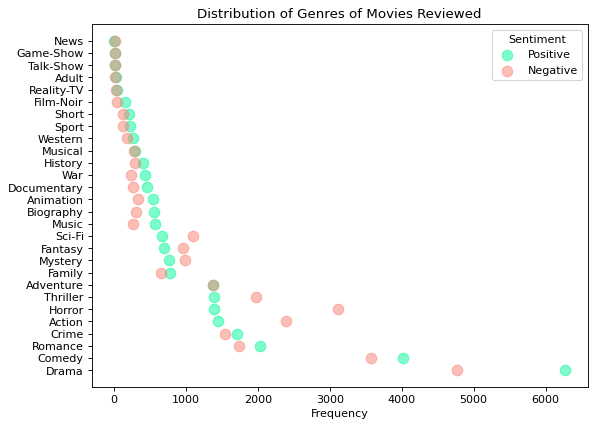

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.scatter(tinydf["Count"], tinydf["Genre"], color = "mediumspringgreen", alpha = 0.5 , s = 90)
plt.scatter(tinydf2["Count"], tinydf2["Genre"],color = "salmon", alpha = 0.5, s = 90)
plt.xticks(rotation = 0)
plt.legend(["Positive", "Negative"], title = "Sentiment")
plt.title("Distribution of Genres of Movies Reviewed")
plt.xlabel("Frequency")
plt.show()

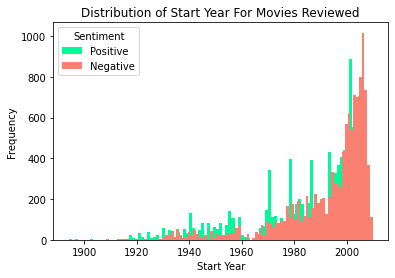

In [ ]:
plt.hist(pos_test["startyear"], color = "mediumspringgreen", bins = 100)
plt.hist(neg_train["startyear"], color = "salmon", bins = 100)
plt.xlabel("Start Year")
plt.ylabel("Frequency")
plt.title("Distribution of Start Year For Movies Reviewed")
plt.legend(["Positive", "Negative"], title = "Sentiment")
plt.show()

In [ ]:
pos = pd.DataFrame(pos_test.groupby(by = "isadult").size())
neg = pd.DataFrame(neg_train.groupby(by = "isadult").size())

In [ ]:
neg

,0
isadult,
False,11893
True,19


In [ ]:
pos["isadult"] = pos.index
pos.columns = ["Count","isadult"]
pos

,Count,isadult
isadult,,
False,11707,False
True,25,True


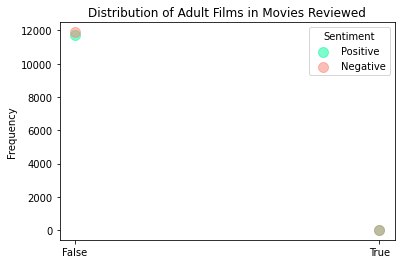

In [ ]:
plt.scatter(["False","True"], pos["Count"], alpha = 0.5, color = "mediumspringgreen", s = 100)
plt.scatter(["False", "True"], [11893,19], color = "salmon", alpha = 0.5, s = 100)
plt.title("Distribution of Adult Films in Movies Reviewed")
plt.ylabel("Frequency")
plt.legend(["Positive", "Negative"], title = "Sentiment")
plt.show()

In [ ]:
pos_test.head(1)

,ReviewID,titleid,titletype,primarytitle,originaltitle,isadult,startyear,endyear,runtimeminutes,genres,Review,Score
0,0,tt0406816,movie,The Guardian,The Guardian,False,2006,NaN,139.0,"[""'Action'"", ""'Adventure'"", ""'Drama'""]",I went and saw this movie last night after bei...,10


In [ ]:
res = pos_test.set_index(['ReviewID',	'titleid',	'titletype',	'primarytitle',	'originaltitle',	'isadult',	'startyear',	'endyear',	'runtimeminutes'])['genres'].apply(pd.Series).stack()
res = res.reset_index()

In [ ]:
res

,ReviewID,titleid,titletype,primarytitle,originaltitle,isadult,startyear,endyear,runtimeminutes,level_9,0
0,0,tt0406816,movie,The Guardian,The Guardian,False,2006,NaN,139.0,0,"[""'Action'"", ""'Adventure'"", ""'Drama'""]"
1,1,tt0406816,movie,The Guardian,The Guardian,False,2006,NaN,139.0,0,"[""'Action'"", ""'Adventure'"", ""'Drama'""]"
2,2,tt0406816,movie,The Guardian,The Guardian,False,2006,NaN,139.0,0,"[""'Action'"", ""'Adventure'"", ""'Drama'""]"
3,3,tt0406816,movie,The Guardian,The Guardian,False,2006,NaN,139.0,0,"[""'Action'"", ""'Adventure'"", ""'Drama'""]"
4,4,tt0406816,movie,The Guardian,The Guardian,False,2006,NaN,139.0,0,"[""'Action'"", ""'Adventure'"", ""'Drama'""]"
...,...,...,...,...,...,...,...,...,...,...,...
11715,11727,tt0450357,tvSeries,Wonder Showzen,Wonder Showzen,False,2005,2006.0,30.0,0,"[""'Animation'"", ""'Comedy'""]"
11716,11728,tt0450357,tvSeries,Wonder Showzen,Wonder Showzen,False,2005,2006.0,30.0,0,"[""'Animation'"", ""'Comedy'""]"
11717,11729,tt0450357,tvSeries,Wonder Showzen,Wonder Showzen,False,2005,2006.0,30.0,0,"[""'Animation'"", ""'Comedy'""]"
11718,11730,tt0450357,tvSeries,Wonder Showzen,Wonder Showzen,False,2005,2006.0,30.0,0,"[""'Animation'"", ""'Comedy'""]"


In [ ]:
df = pos_test.apply(lambda x: pd.Series(pos_test['genres']), axis = 1).stack().reset_index(level = 1, drop = True)
df.name = 'genres'
df.head(1)

0    ["'Action'", "'Adventure'", "'Drama'"]
Name: genres, dtype: object

In [ ]:
df2 = pos_test.drop('genres', axis = 1).join(df)